##### Import Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# High-Resolution Graph Output option for Retina Displays
%config InlineBackend.figure_format = 'retina'

##### Fetching NGII Data

In [2]:
shp_path = '89_data/shp/NGII_SIDO/Z_NGII_N3A_G0010000.shp'

In [3]:
sido_gdf = gpd.read_file(shp_path, encoding='euc-kr')
sido_gdf.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((932629.315 1508520.449, 932629..."
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((1049231.579 1666542.963, 10492..."
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((1163496.075 1906689.767, 11635..."
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((898759.456 1670482.743, 898760..."
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((953538.952 1794637.930, 953543..."


* Check GIS Coordinate System Information

In [8]:
sido_gdf.crs

<Bound CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- [east]: Easting (m)
- [north]: Northing (m)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from Korea 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: Korea 2000 / Unified CS

##### Basic Visualization

* with geopandas

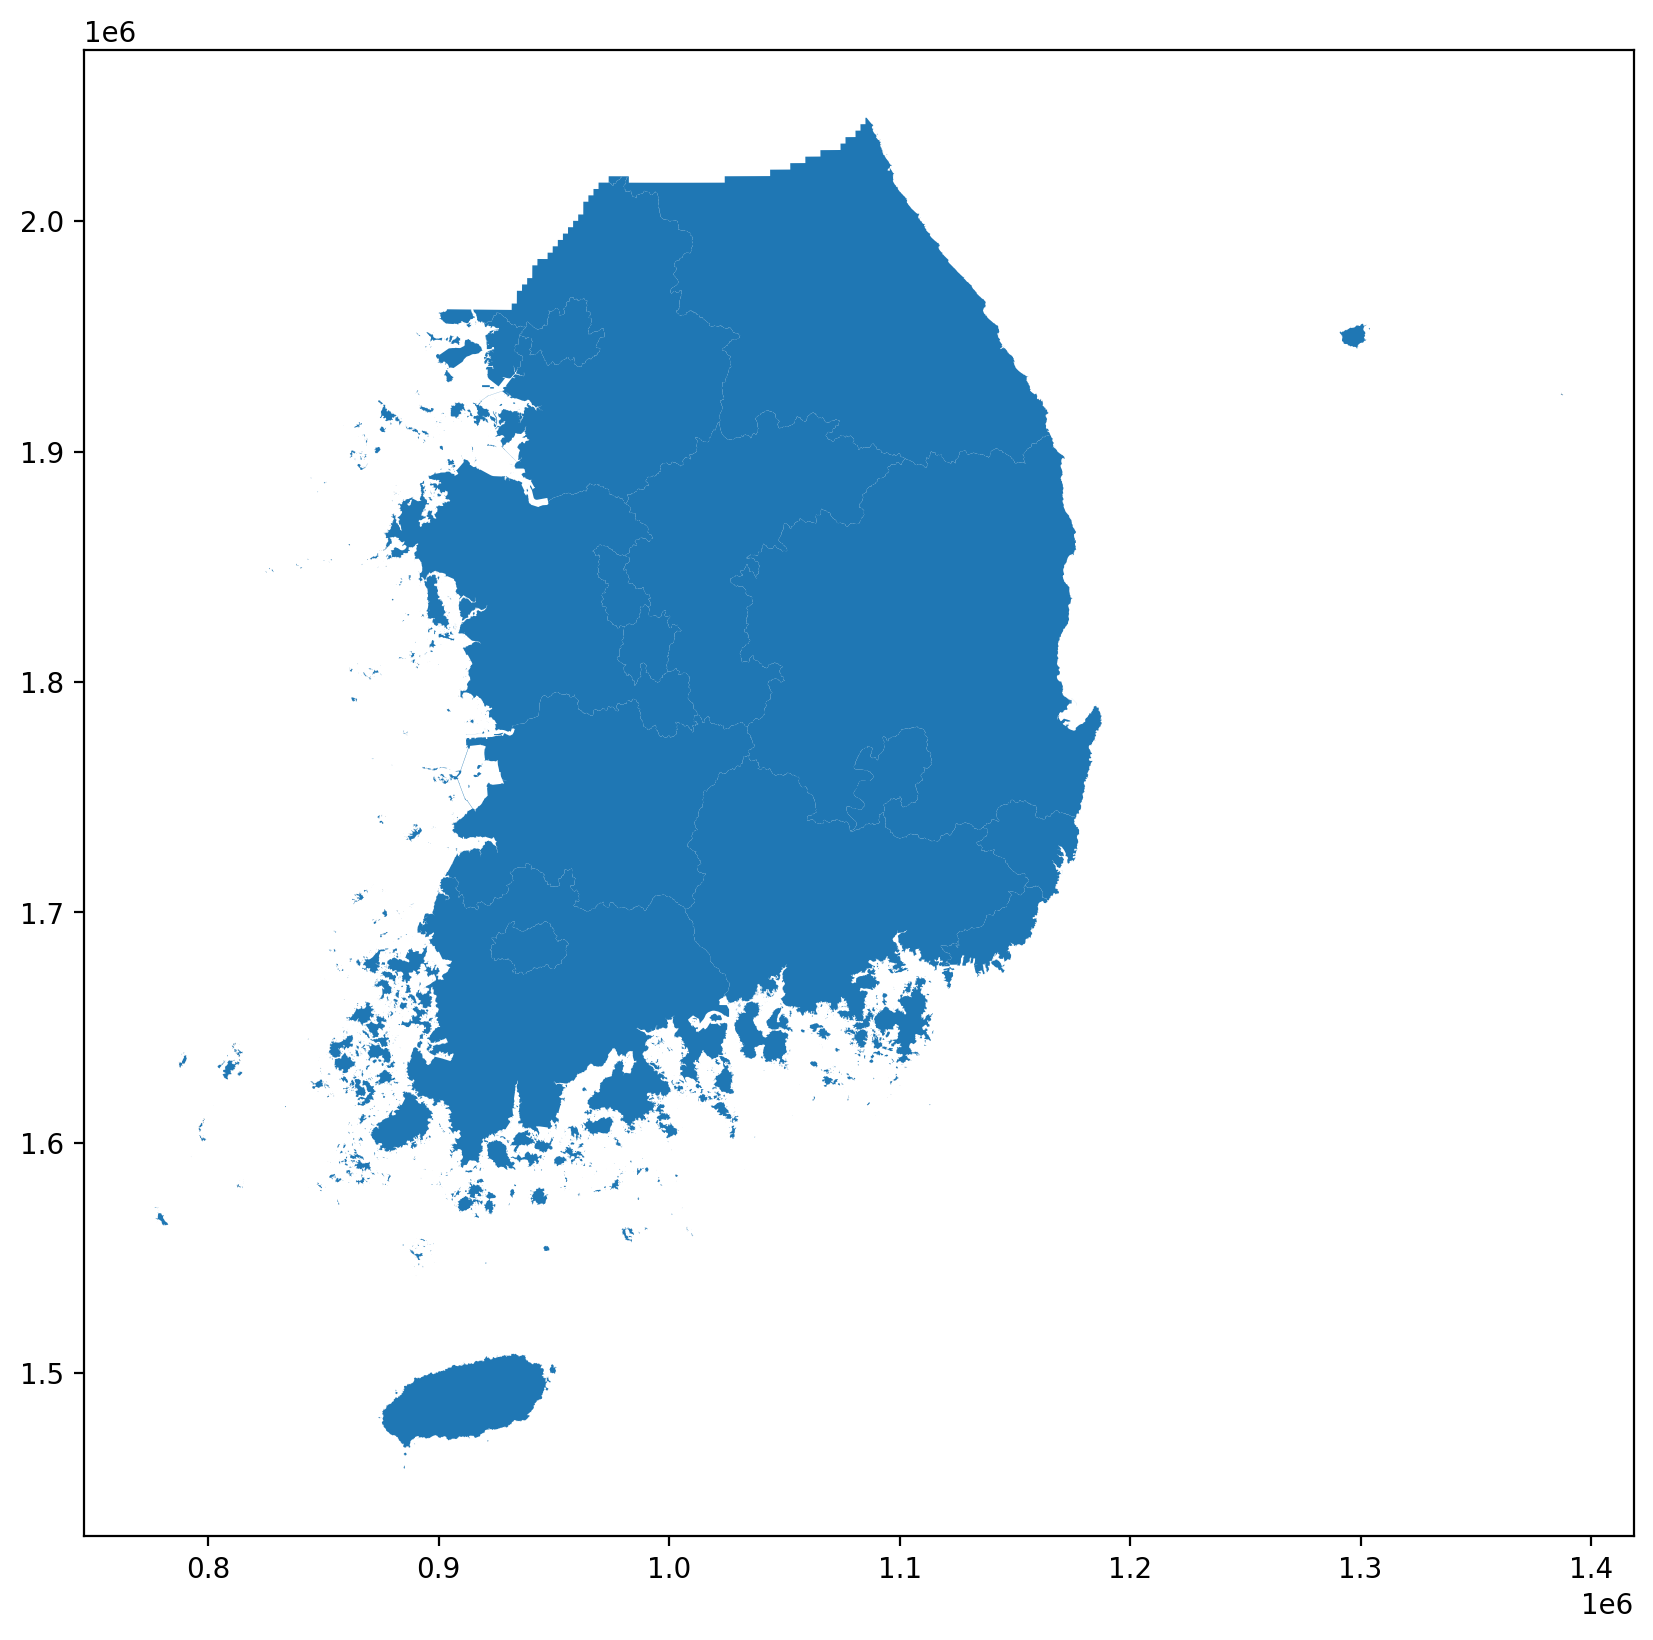

In [5]:
sido_gdf.plot(figsize=(10, 10))
plt.show()

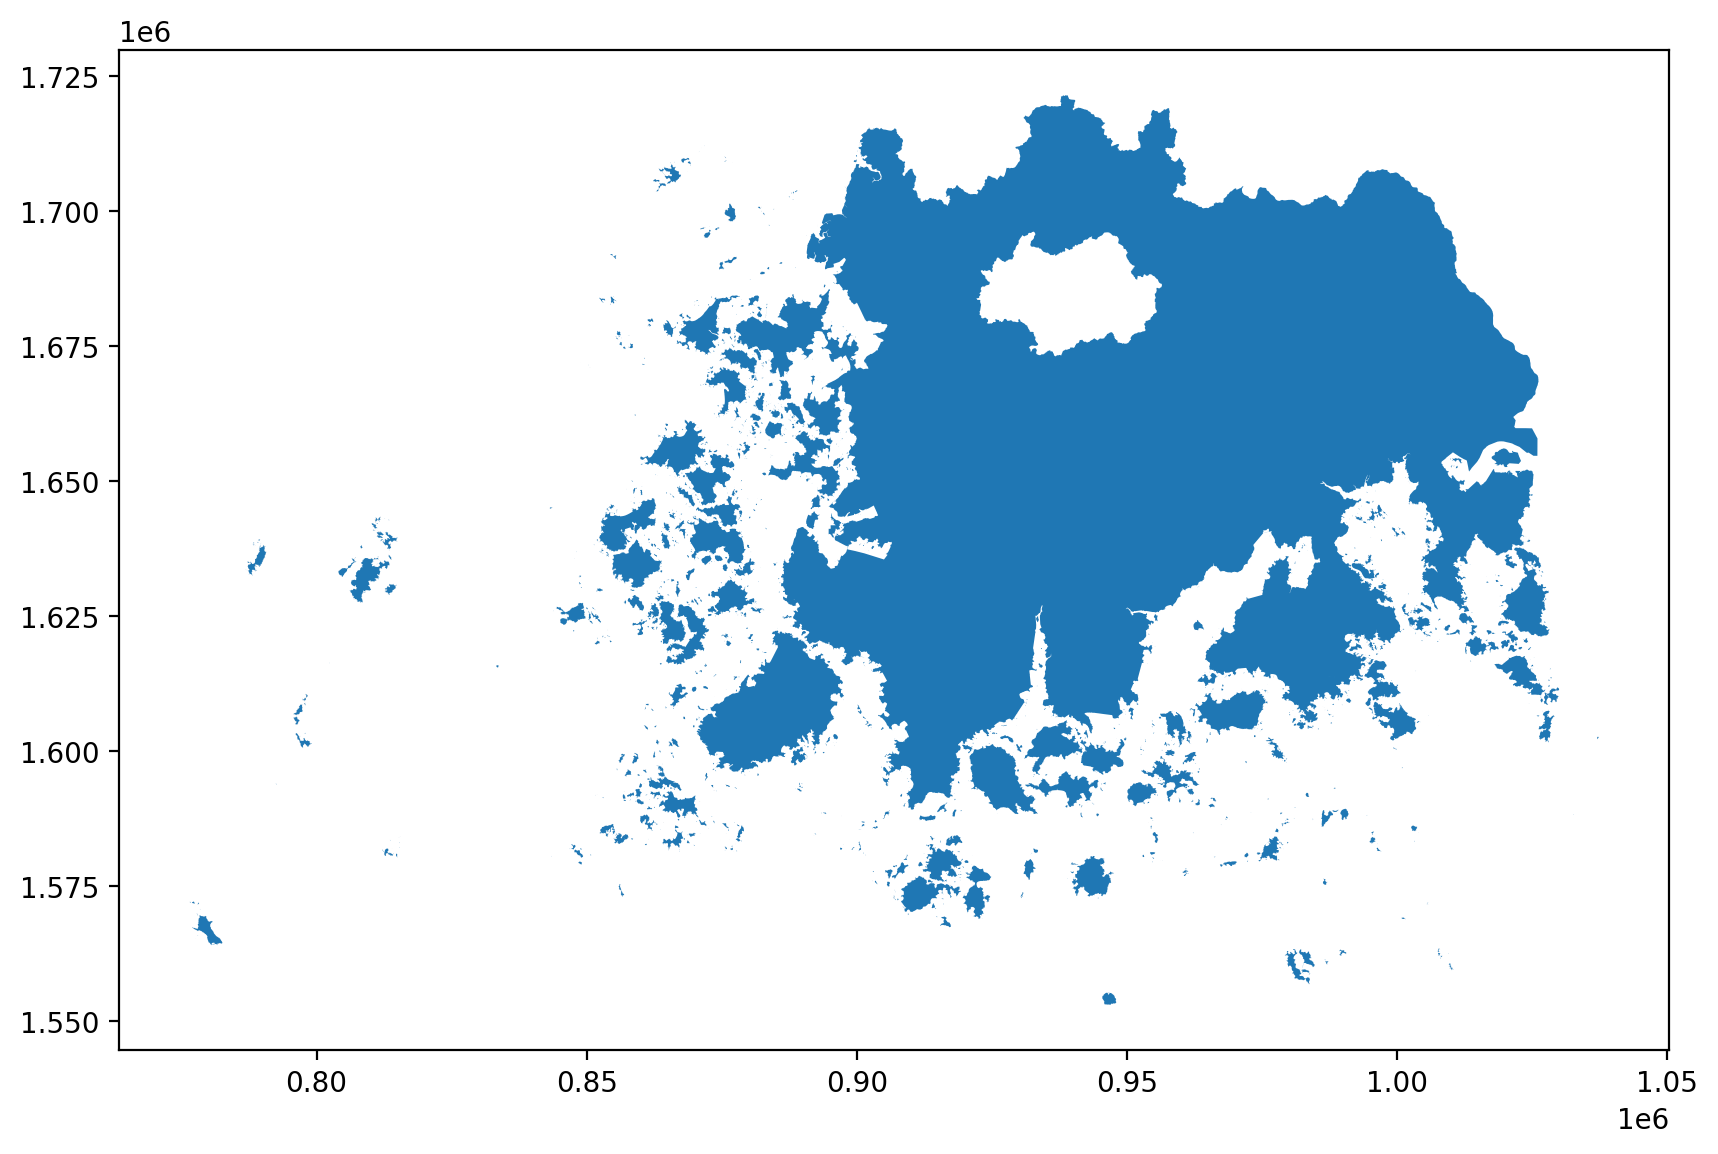

In [7]:
sido_gdf[sido_gdf['NAME']=='전라남도'].plot(figsize=(10,10))
plt.show()

* with matplotlib

[Text(0, 1400000.0, '1400000'),
 Text(0, 1500000.0, '1500000'),
 Text(0, 1600000.0, '1600000'),
 Text(0, 1700000.0, '1700000'),
 Text(0, 1800000.0, '1800000'),
 Text(0, 1900000.0, '1900000'),
 Text(0, 2000000.0, '2000000'),
 Text(0, 2100000.0, '2100000')]

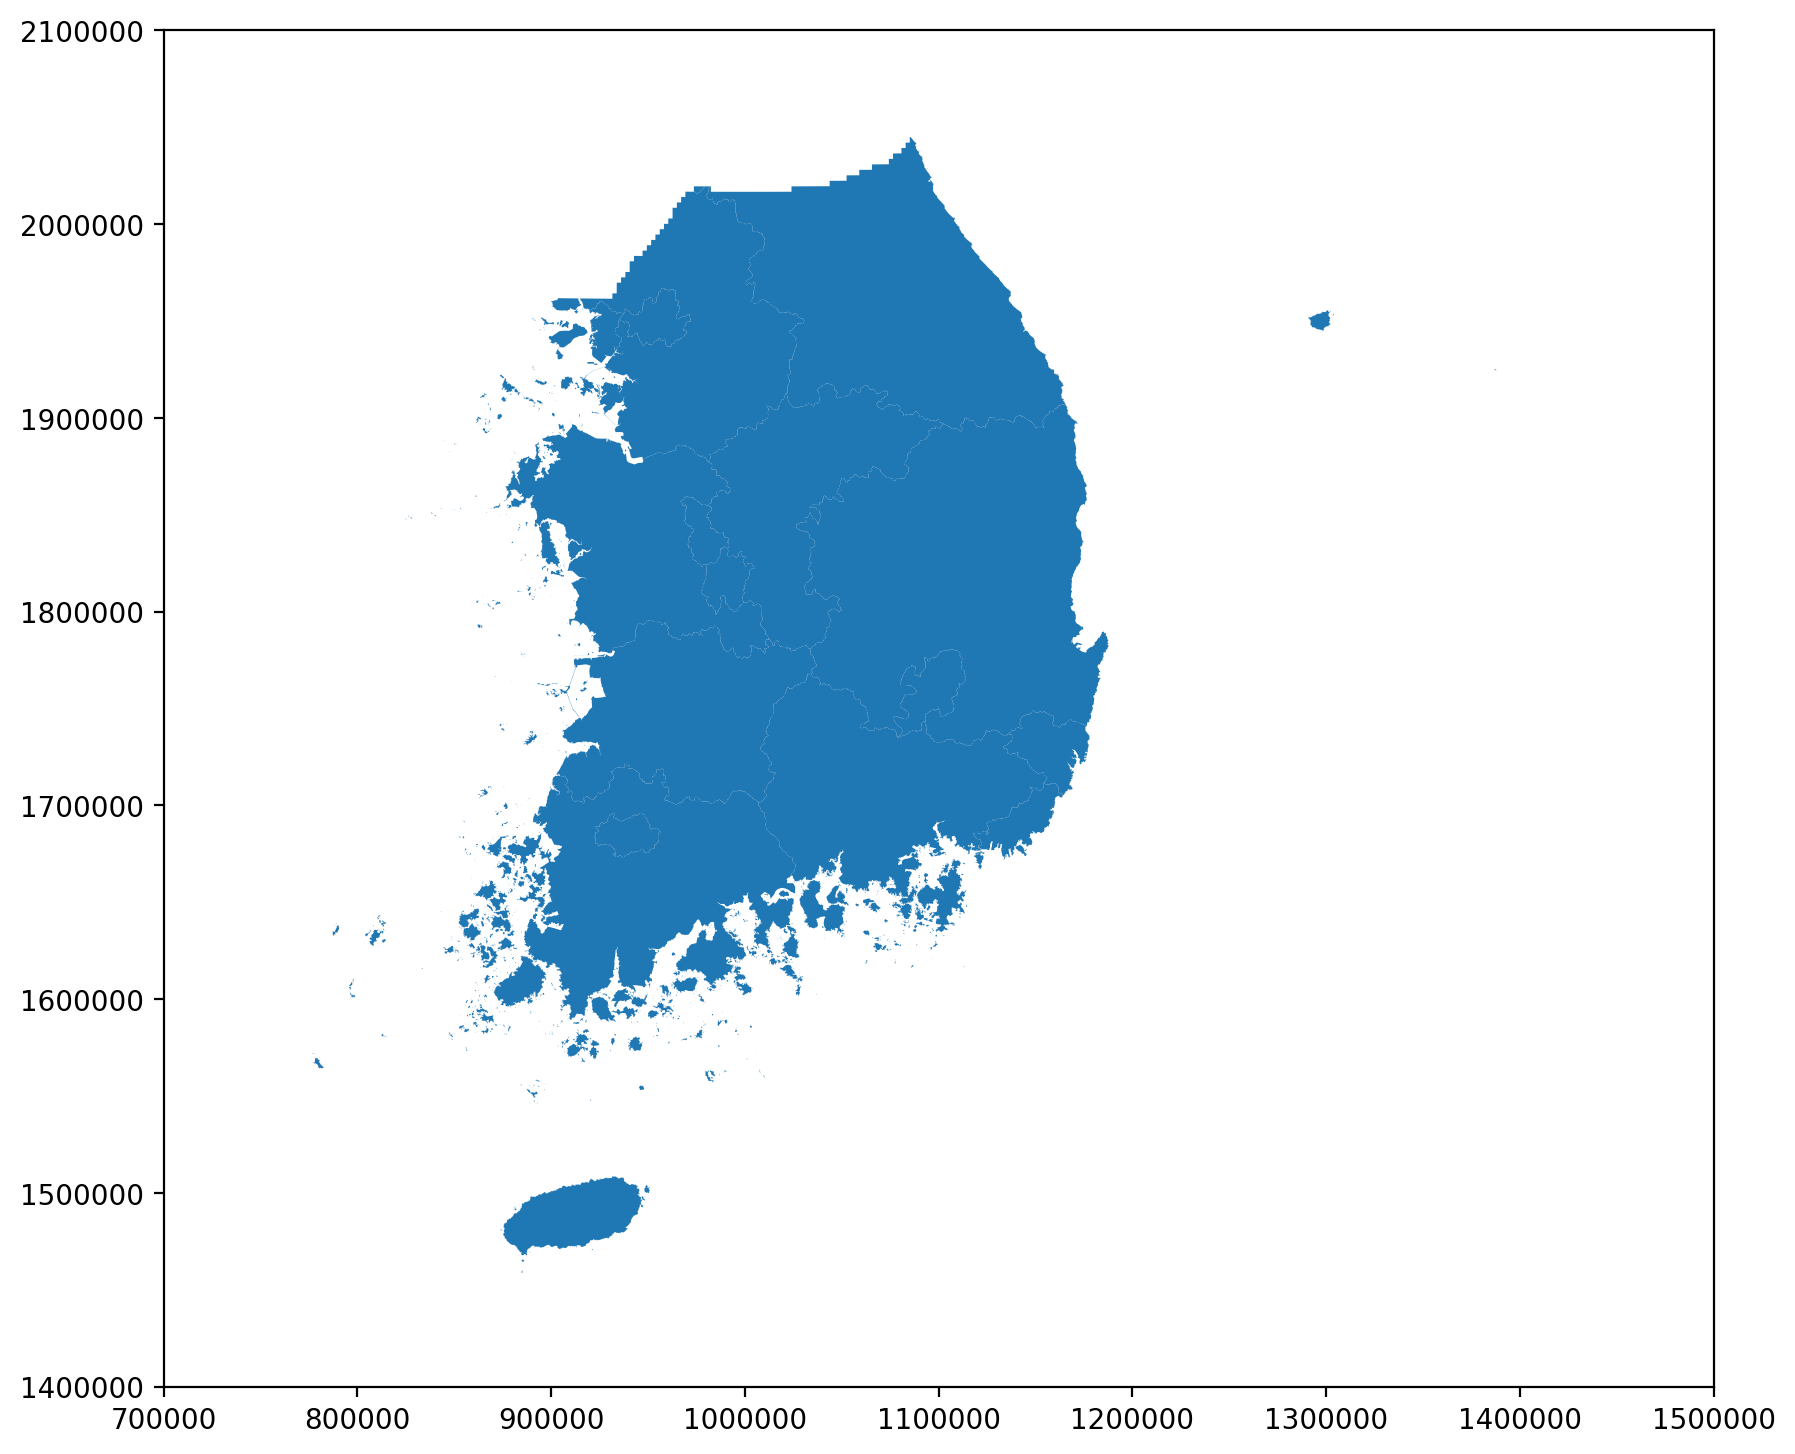

In [11]:
sido_gdf.plot(figsize=(10,10))

value_x = plt.gca().get_xticks()
value_y = plt.gca().get_yticks()

# 'set_xticks' and 'set_xticklabels' must always be used together.
plt.gca().set_xticks(value_x)
plt.gca().set_xticklabels([f'{x:.0f}' for x in value_x])
plt.gca().set_yticks(value_y)
plt.gca().set_yticklabels([f'{y:.0f}' for y in value_y])

##### Fetching VW-LAB Data with 'geojson' file

In [12]:
shp_json_path = 'https://github.com/vuski/admdongkor/raw/master/ver20220701/HangJeongDong_ver20220701.geojson'
dong_gdf = gpd.read_file(shp_json_path)
dong_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3513 non-null   int64   
 1   adm_nm    3513 non-null   object  
 2   adm_cd    3513 non-null   object  
 3   adm_cd2   3513 non-null   object  
 4   sgg       3513 non-null   object  
 5   sido      3513 non-null   object  
 6   sidonm    3513 non-null   object  
 7   sggnm     3513 non-null   object  
 8   adm_cd8   3513 non-null   object  
 9   geometry  3513 non-null   geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 274.6+ KB


In [16]:
dong_gdf.crs
# `EPSG:4326`는 WGS84 위도, 경도 좌표계로 GPS 측량시 기본적으로 획득되는 좌표계임.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
dong_gdf.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


##### Basic Visualization II

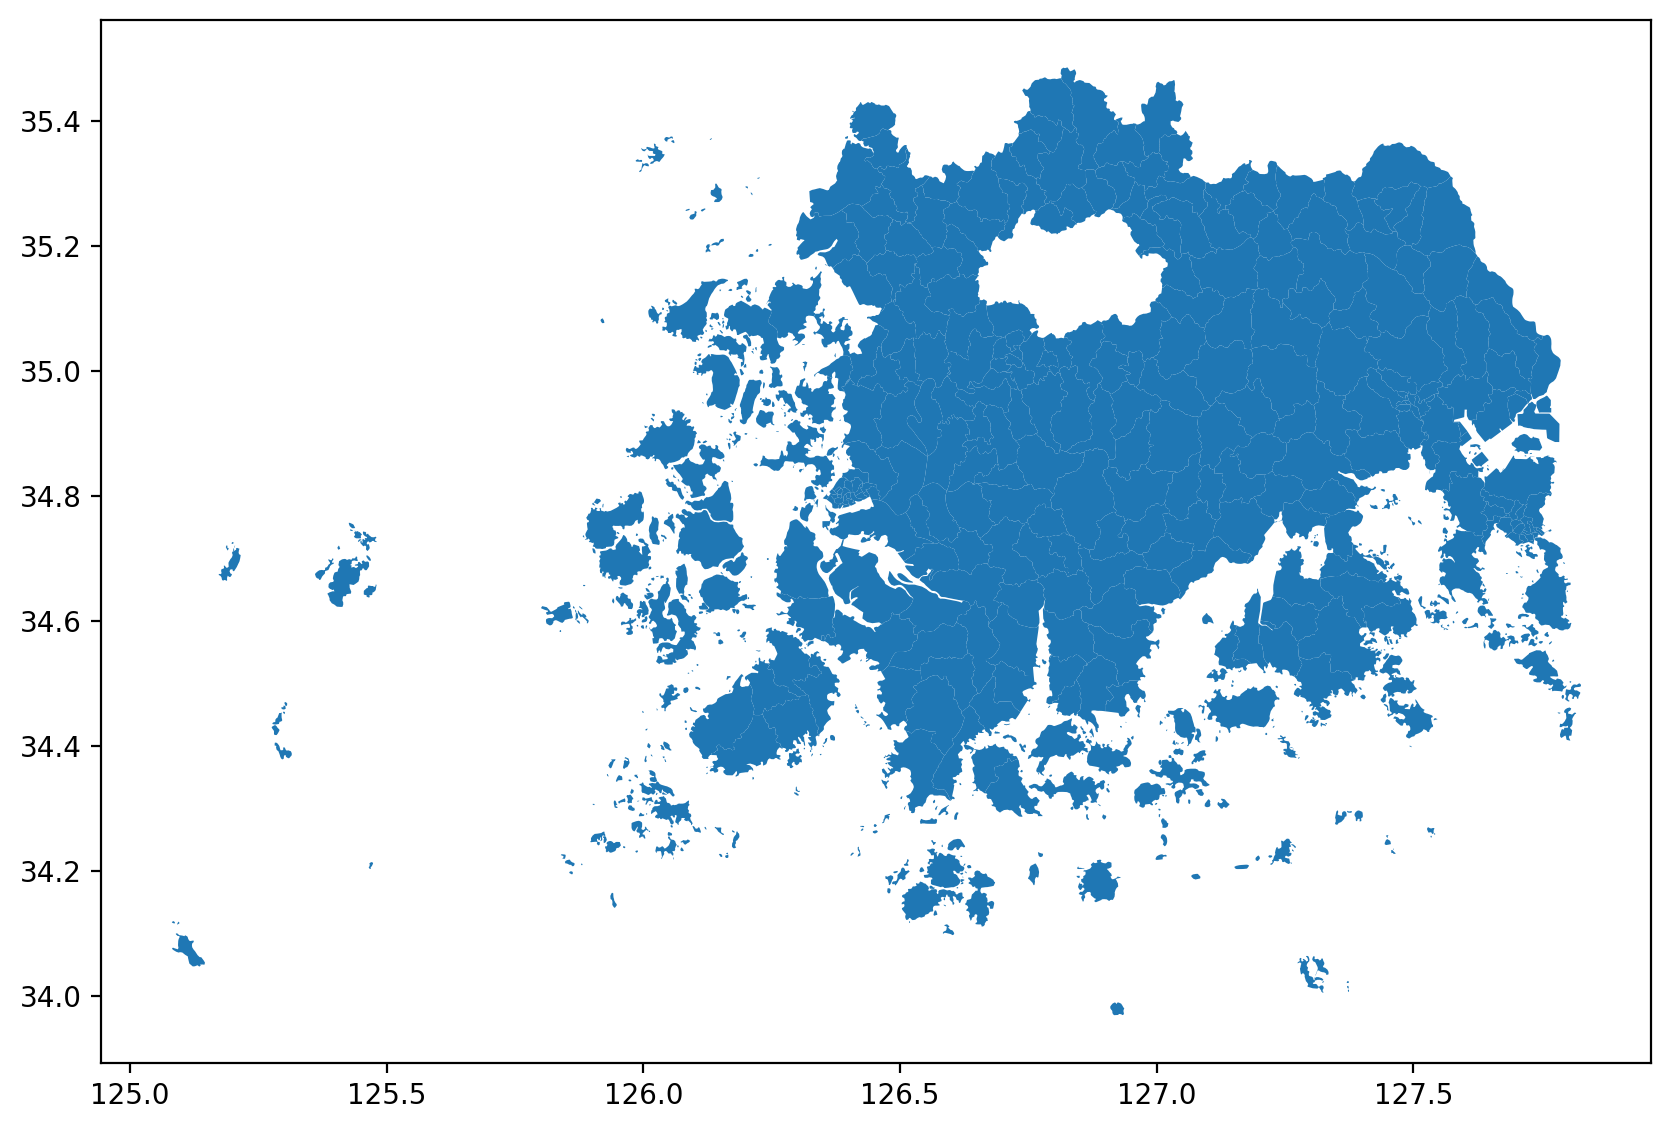

In [14]:
dong_gdf[dong_gdf['sidonm']=='전라남도'].plot(figsize=(10,10))
plt.show()

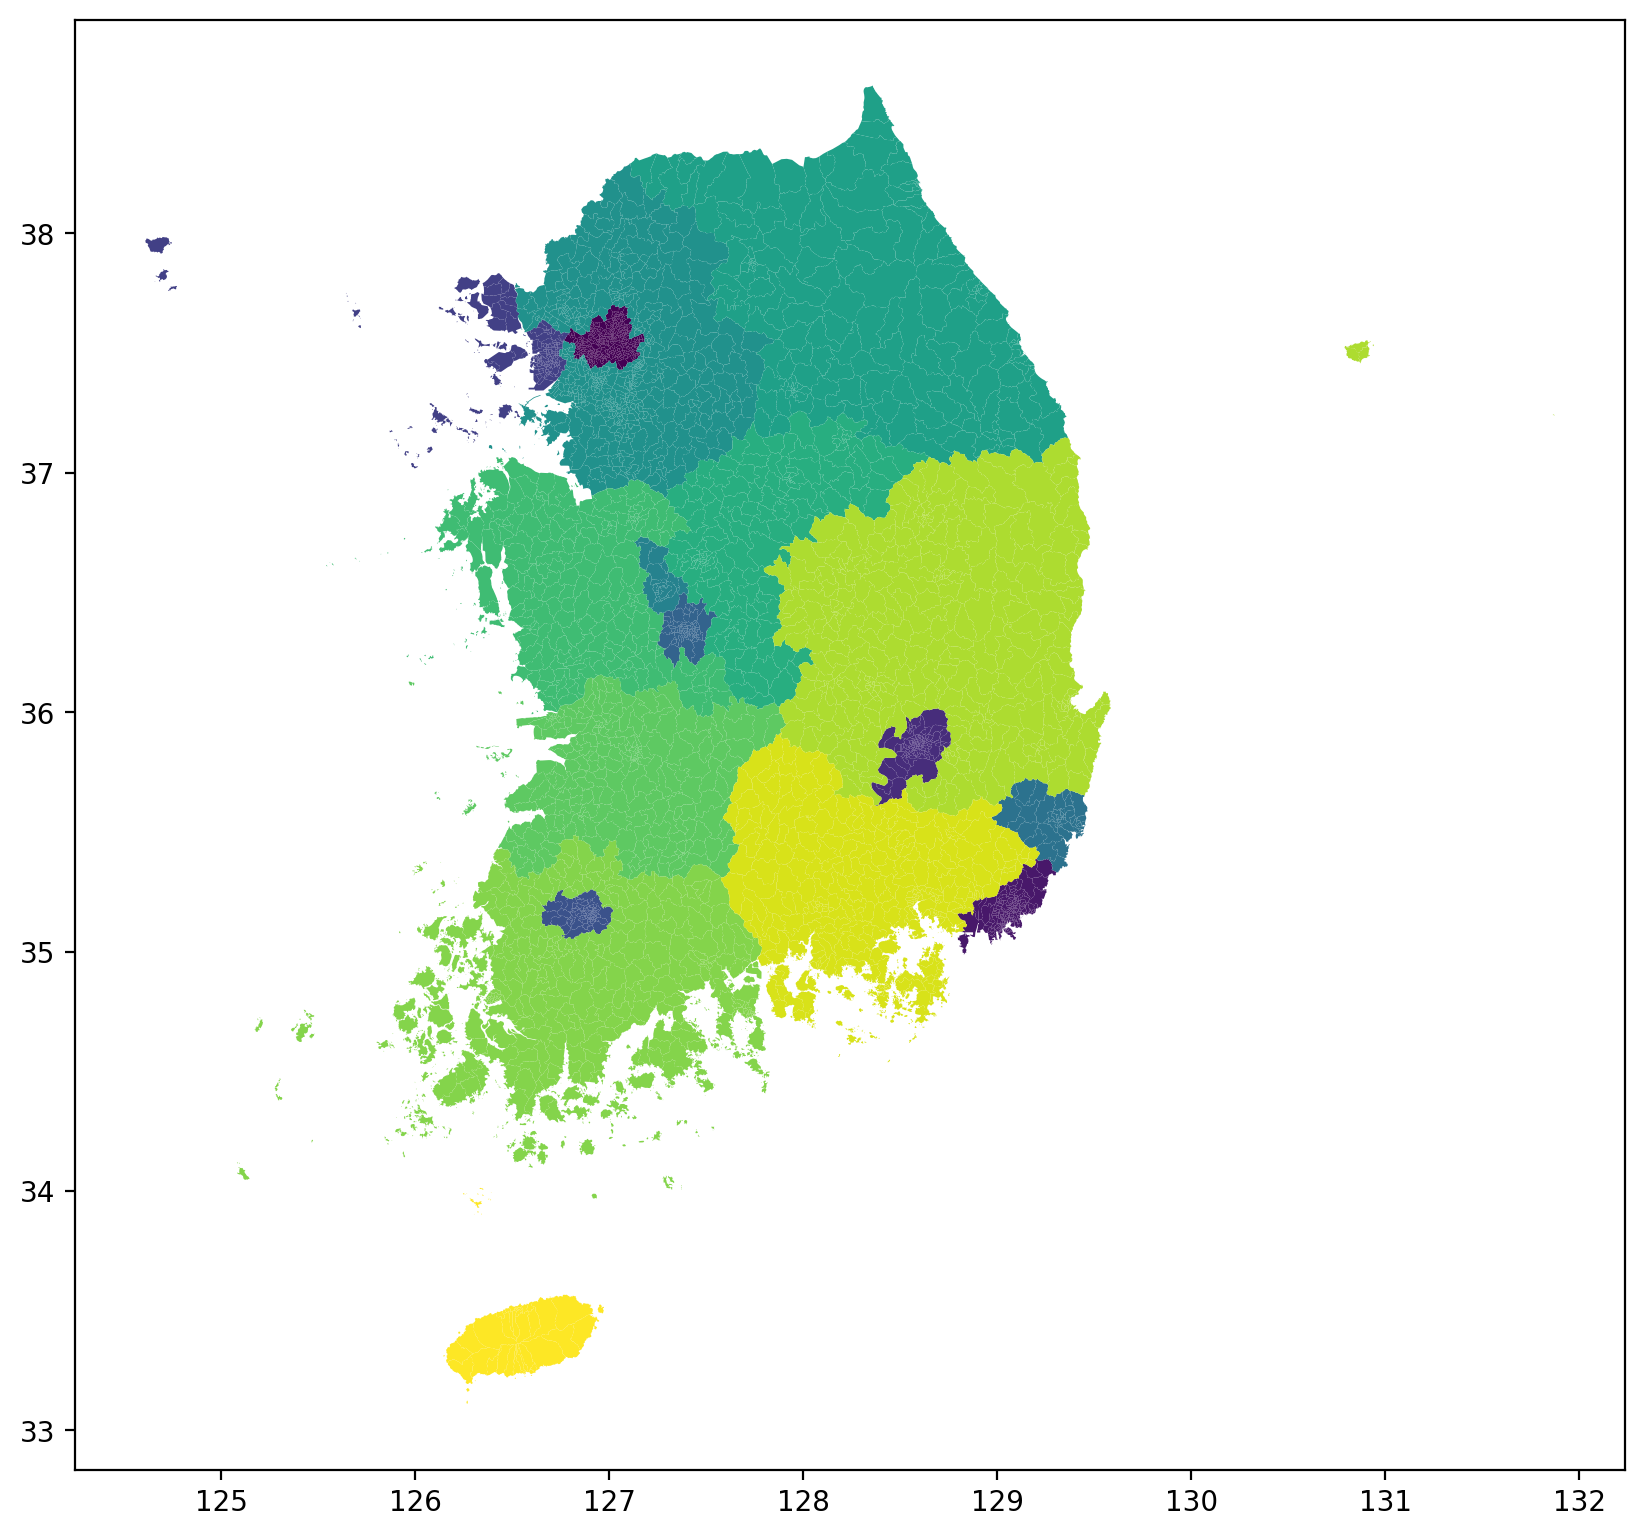

In [19]:
# cmap:
# - rainbow
# - viridis
dong_gdf.plot('sido', categorical=True, cmap='viridis', figsize=(10,10))
plt.show()